### Robot Learning

### Assignment 7

Solutions are due on 31.05.2022 before the lecture.

## Task 7.1)

Consider a pendulum with point-mass $m = 3 kg$ and length $l = 6 m$.

The state $s$ is described by angle $\theta$ (deviation from upright) and angular speed $\dot{\theta} = \omega$.

Gravity and friction act on the pendulum. The dampening force due to friction is proportional to the angular velocity and described by the factor $\gamma = 1$. 

Control actions $a_t$ produce a torque around the pendulum hinge joint.

Model the system behavior as a discrete-time system with a step size of $\vartriangle = 0.01 s$!

Compute the evolution of the state over $10 s$ for an initial state of $\theta_0 = -0.4 rad$
and $\omega_0 = 0.6\frac{rad}{s}$ with zero control input.

You can simulate the system behaviour by applying Euler's method and iterating

$s_{t + \vartriangle} \approx s_t + \vartriangle \cdot \dot{s_t} + \begin{pmatrix} 0 \\ \frac{1}{I} \end{pmatrix} \cdot a_t$

with $s_t = \begin{pmatrix} \theta_t \\ \omega_t \end{pmatrix}$, $\dot{s_t} = \begin{pmatrix} \omega_t \\ \ddot{\theta_t} \end{pmatrix}$ and the moment of interia $I = m \cdot l^2$.

During simulation, enforce $\theta_t \in [-\pi,\pi]$. Finally, show the system evolution by plotting $\theta$ and $\omega$ against time.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

m = 3 #Mass
l = 6 #Length
g = 9.81 #Linear acceleration due to gravity
delta = 0.01 #Time step
I = m * l**2 #Inertia
state = dict()

#Initial conditions
theta_0 = -0.4 #Initial Angular position
omega_0 = 0.6 #Initial Angular velocity
a = 0 #Control Input
state[0] = np.array([theta_0,omega_0])

ProgressBar = tqdm(np.arange(0,10,delta))
for step in ProgressBar: 
    t = round(step,3)
    next_step = round(t + delta,3)
    theta_t, omega_t = state[t]
    thetaDD_t = -(g/l) * theta_t
    stateD_t = np.array([omega_t,thetaDD_t])
    state[next_step] = state[t] + delta * stateD_t + np.array([0, 1/I]) * a

100%|██████████| 1000/1000 [00:00<00:00, 17430.73it/s]


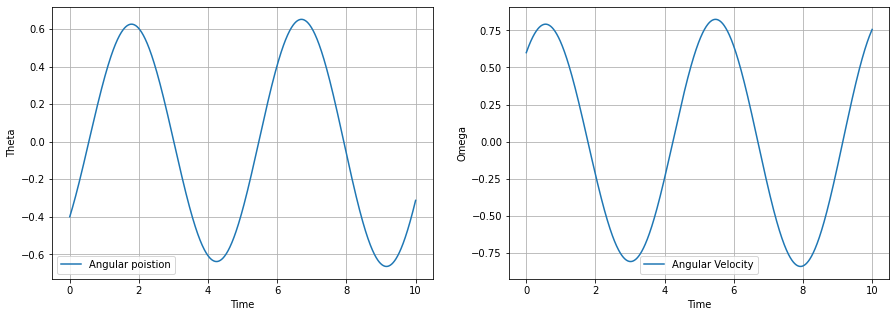

In [43]:
time ,state_values = zip(*state.items())
[theta], [omega] = np.vsplit(np.array(state_values).T,2)

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(15,5))
ax1.set_xlabel("Time")
ax1.set_ylabel("Theta")
ax1.plot(time,theta,label='Angular poistion')
ax1.legend()
ax1.grid()
ax2.set_xlabel("Time")
ax2.set_ylabel("Omega")
ax2.plot(time,omega,label='Angular Velocity')
ax2.legend()
ax2.grid()
plt.show()

## Task 7.2)

Linearize the system around the upward state with zero angular velocity: ($\theta = 0$, $\omega = 0$).

Provide a linear state transition model

$s_{t+\vartriangle} = A \cdot s_t + B \cdot a_t$

for the pendulum system dynamics and compare the evolution of the state for this linearized system with the original dynamics for the same initial state of $\theta_0 = -0.4 rad$ and $\omega_0 = 0.6 \frac{rad}{s}$ with zero control input. Again enforce $\theta_t \in [-\pi,\pi]$ during simulation. 

<div style="text-align: right; font-weight:bold"> 4 Points </div>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

m = 3 #Mass
l = 6 #Length
g = 9.81 #Linear acceleration due to gravity
delta = 0.01 #Time step
I = m * l**2 #Inertia
state = dict()

#Initial conditions
theta_0 = -0.4 #Initial Angular position
omega_0 = 0.6 #Initial Angular velocity
a = 0 #Control Input
state[0] = np.array([theta_0,omega_0])

A = np.array([[1, delta],[-delta*g/l, 1]])
B = np.array([0, 1/I])

ProgressBar = tqdm(np.arange(0,10,delta))
for step in ProgressBar: 
    t = round(step,3)
    next_step = round(t + delta,3) 
    state[next_step] = A@state[t] + B*a


100%|██████████| 1000/1000 [00:00<00:00, 51786.01it/s]


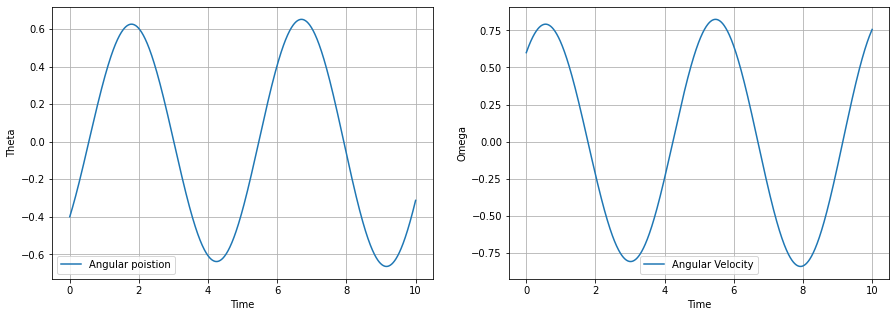

In [45]:
time ,state_values = zip(*state.items())
[theta], [omega] = np.vsplit(np.array(state_values).T,2)

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(15,5))
ax1.set_xlabel("Time")
ax1.set_ylabel("Theta")
ax1.plot(time,theta,label='Angular poistion')
ax1.legend()
ax1.grid()
ax2.set_xlabel("Time")
ax2.set_ylabel("Omega")
ax2.plot(time,omega,label='Angular Velocity')
ax2.legend()
ax2.grid()
plt.show()

## Task 7.3)

Define a reward function which penalizes deviation from the standing still upright state and the magnitude of control actions in a quadratic way.

<div style="text-align: right; font-weight:bold"> 2 Point </div>

In [49]:
Q_T = np.array([1,0],[0,1])
R_T = 1
def getReward(st,at):
    return -(st.reshape(2,1)@Qt@st + at*Rt*at)

## Task 7.4)

Use the method of Linear Quadratic Regulation (LQR) to design a state-feedback policy which optimizes your cost function from **Task 7.3)** over a time horizon of $0.5 s$, starting from the initial condition $\theta_0 = -0.4 rad$ and $\omega_0 = 0.6 \frac{rad}{s}$.

Show how the state evolves when the policy is applied for the original system dynamics without linearization.

<div style="text-align: right; font-weight:bold"> 7 Points </div>

Note that

$(B^T \cdot \Phi_{t+1} \cdot B - R)^{-1} \cdot B^T \cdot \Phi_{t+1} =: Z$

is used both in the calculation of $\Phi_t$ and $L_t$. It is also noteworthy that $\Psi$ is not used for control at all.

In [4]:
T = 0.5
def phi(t):
    if T = 0.5:
        return Q_T
    A.T()



## Task 7.5)

Add zero-mean Gaussian noise with covariance matrix $\Sigma= diag(0.01, 0.04)$ to the state after each transition and compare how the state evolves when above policy is applied from the same initial conditions, again simulating the original system dynamics without linearization.

<div style="text-align: right; font-weight:bold"> 2 Points </div>

In [5]:
# Your code can go here